<a href="https://colab.research.google.com/github/tobuya/exploratory-data-analysis/blob/main/Astronomical_Tabular_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Astronomical Tabular Data Visualization

In [ ]:
# Import the necessary libraries
# 1. Exploration libraries
import os
import pandas as pd
import numpy as np
# 2. Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Read the csv file and turn it into pandas dataframe
str_df = pd.read_csv("https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-")
type(str_df)
str_df.head(3)
str_df.sample(10)
str_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
# Create a directory to save the visualizations
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok = True)
base_dir = f'/content/{folder_name}/'

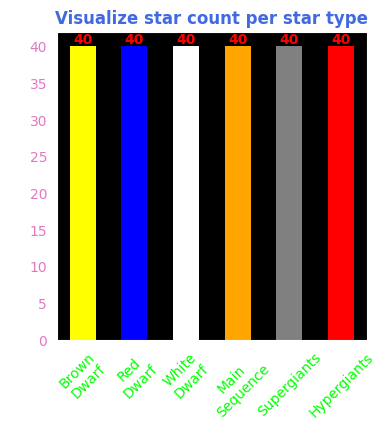

In [ ]:
# Bar chart to visualize the count of stars with respective type
plt.figure(figsize=(4,4))
plt.style.use('dark_background')
ax = str_df['Star type'].value_counts().plot(kind = 'bar', color = ['yellow', 'blue', 'white', 'orange', 'gray', 'red'])
ax.bar_label(ax.containers[0], color = 'red', weight = 'bold')
plt.title('Visualize star count per star type', color = 'royalblue', weight = 'bold')
plt.yticks(color = 'tab:pink')
plt.ylabel('# of stars', color = 'white', fontsize = 10)
plt.xticks(
    ticks = [0, 1, 2, 3, 4, 5],
    labels = ['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence', 'Supergiants', 'Hypergiants'],
    rotation = 45, color = 'lime'
    )
plt.savefig(base_dir + 'barplot_star_count.png')
plt.show()

<ipython-input-5-bf46276bf5c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


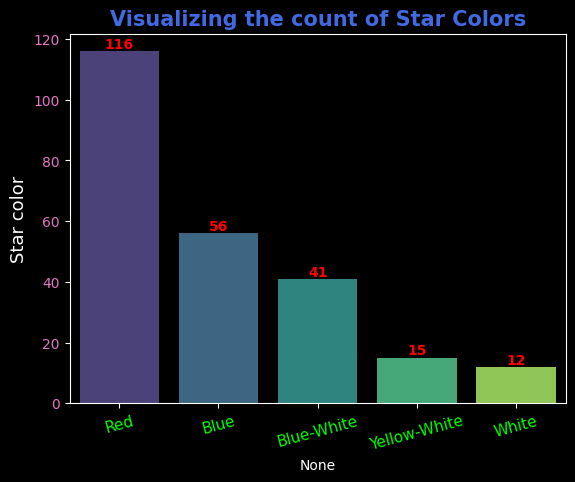

In [ ]:
# Visualize the Star color data
ax = sns.barplot(
    x = str_df['Star color'].value_counts().index,
    y = str_df['Star color'].value_counts(),
    palette = 'viridis'
)
for container in ax.containers:
  ax.bar_label(container, color = 'red', weight = 'bold')
plt.title('Visualizing the count of Star Colors', color = 'royalblue', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 15, color = 'lime', fontsize = 11)
plt.ylabel('Star color', color = 'white', fontsize = 13)
plt.yticks(color = 'tab:pink')
plt.savefig(base_dir + 'star_colors_viz.png')
plt.show()

In [ ]:
str_df.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


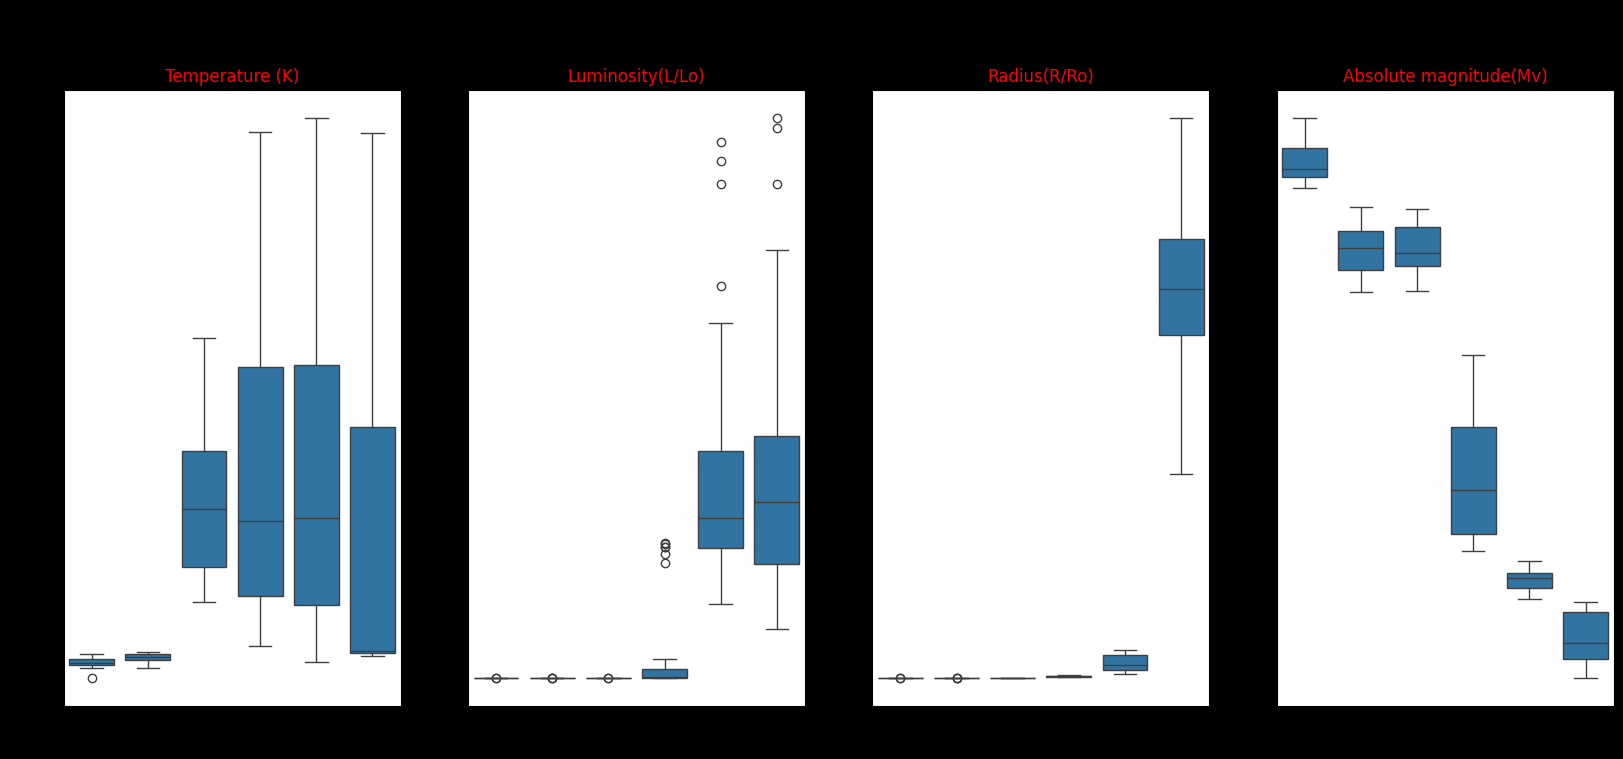

In [ ]:
# Visualize outliers if any by creating by creating boxplots for numeric features
plt.figure(figsize = (20, 8))
plt.style.use('default')
plt.suptitle('Visualizing the outliers in Numeric features of Star Type',
             color = 'black', weight = 'bold', fontsize = 15)
for i in range(4):
  plt.subplot(1, 4, i+1)
  sns.boxplot(x = str_df['Star type'], y = str_df.iloc[:, i])
  plt.title(str_df.columns[i], color = 'red')
  plt.ylabel('')

plt.savefig(base_dir + 'boxplot_star_type.png')

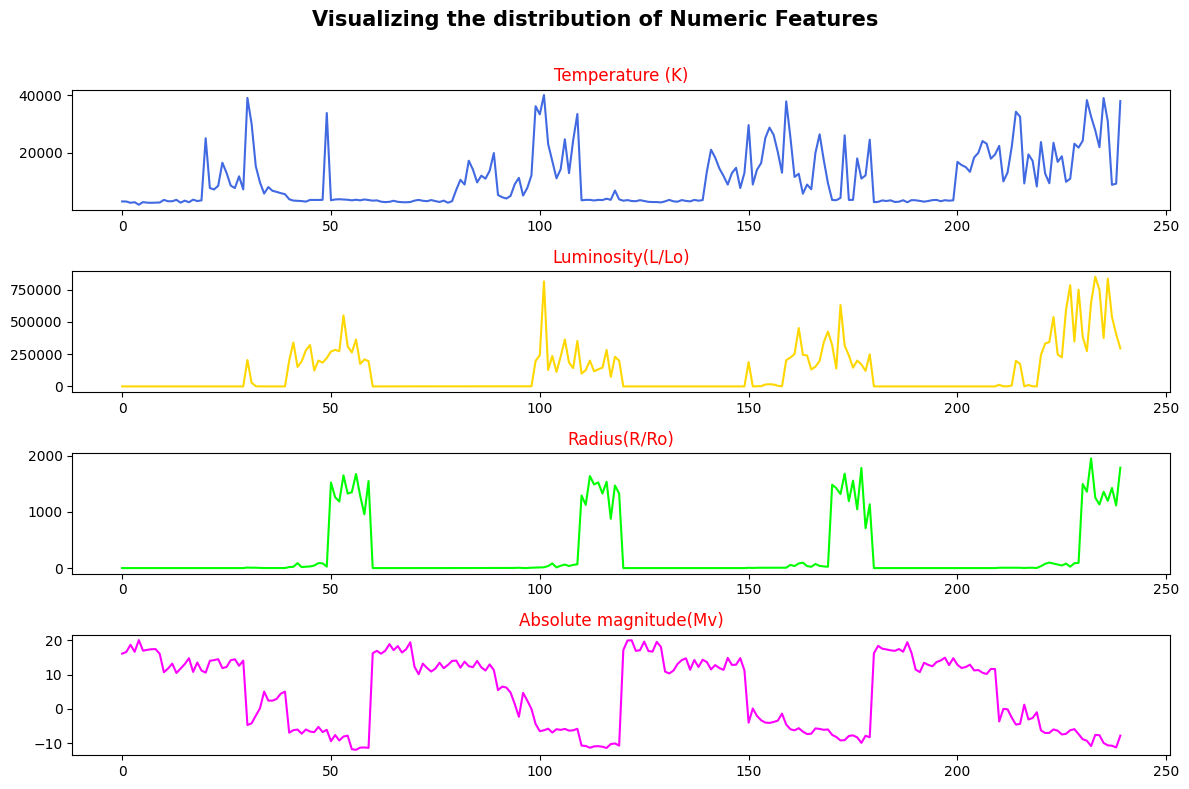

In [ ]:
# Line plots
plt.style.use('default')
colors = ['royalblue', 'gold', 'lime', 'magenta']
plt.figure(figsize = (12, 8))
plt.suptitle('Visualizing the distribution of Numeric Features\n',
             color = 'black', weight = 'bold', fontsize = 15)

for i in range(4):
  plt.subplot(4, 1, i+1)
  plt.plot(str_df.iloc[:, i], color = colors[i])
  plt.title(str_df.columns[i], color = 'red')

plt.tight_layout()
plt.savefig(base_dir + 'line_subplot.png')
plt.show()

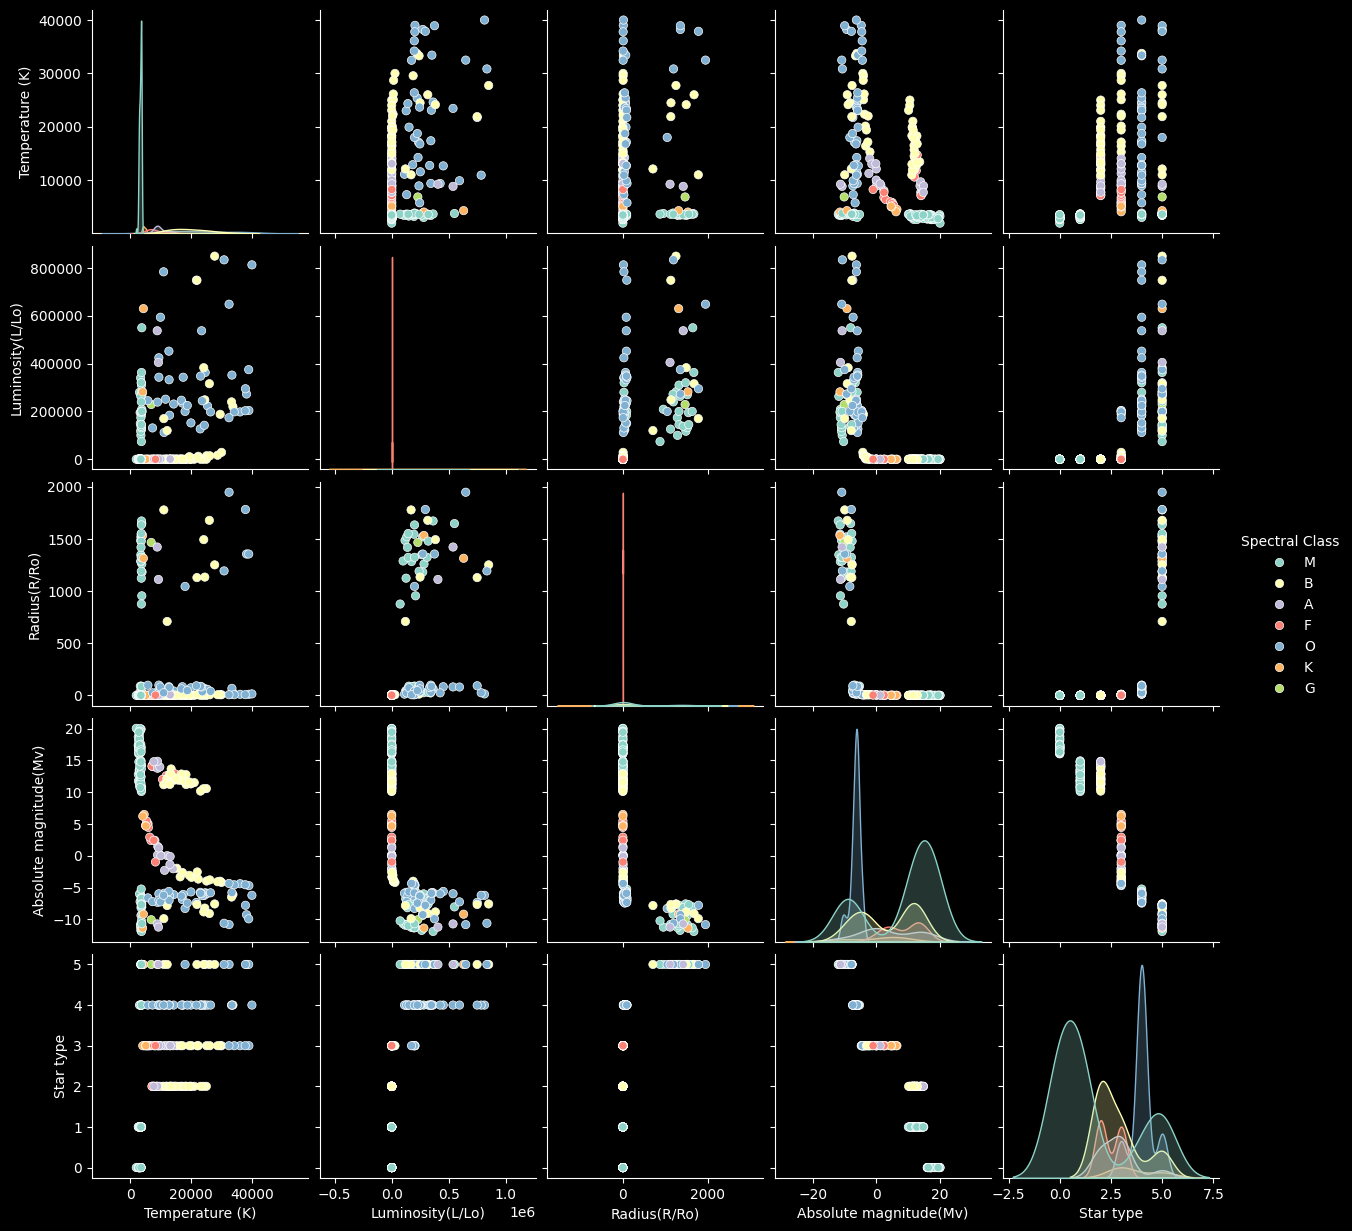

In [ ]:
# Get a pairplot - scatter
plt.style.use('dark_background')
sns.pairplot(str_df, hue = 'Spectral Class')
plt.savefig(base_dir + 'pairplot.png')
plt.show()

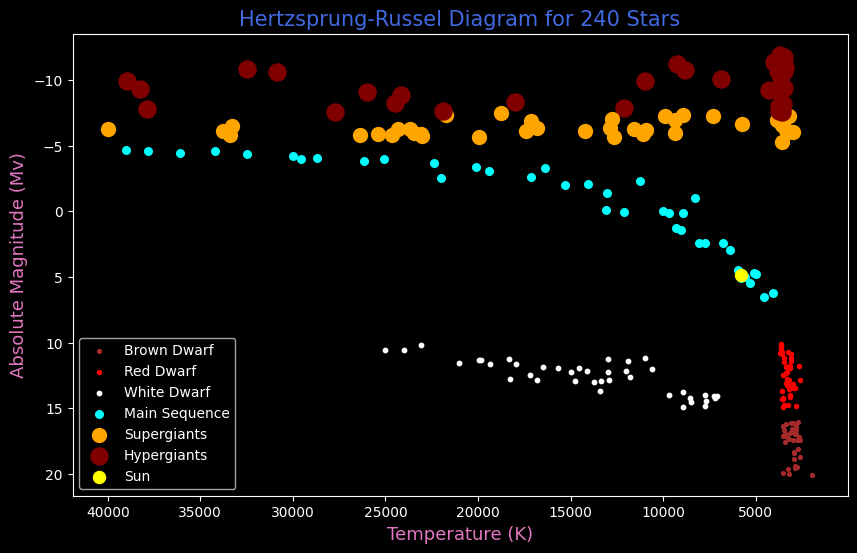

In [ ]:
# Hertzsprung-Russell Diagram
star_type = str_df['Star type'].values
temperature = str_df['Temperature (K)'].values
abs_mag = str_df['Absolute magnitude(Mv)'].values

star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'},
}

axes = []
labels = set()

plt.figure(figsize = (10, 6))

for i in range(len(star_type)):
  properties = star_types[star_type[i]]

  if properties['label'] not in labels:
    ax = plt.scatter(temperature[i], abs_mag[i],
                c = properties['color'],
                s = properties['size'],
                marker = properties['marker'],
                label = properties['label'])
    axes.append(ax)
    labels.add(properties['label'])
  else:
    plt.scatter(temperature[i], abs_mag[i],
                c = properties['color'],
                s = properties['size'],
                marker = properties['marker'],
                label = properties['label'])

#Adding data for Sun
ax_sun = plt.scatter(5778, 4.83, s = 75, c = 'yellow', marker = 'o', label = 'Sun')
axes.append(ax_sun)
labels.add('Sun')

plt.title(f'Hertzsprung-Russel Diagram for {len(star_type)} Stars', fontsize = 15, color = 'royalblue')
plt.ylabel('Absolute Magnitude (Mv)', fontsize = 13, color = 'tab:pink')
plt.xlabel('Temperature (K)', fontsize = 13, color = 'tab:pink')

plt.legend(handles = axes)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.savefig(base_dir + 'hr_diagram.png')
plt.show()

In [ ]:
# Extract the output folders from Google Colab to my PC

'''
1. Import files from colab module of google
2. Create a zip file of the folder in the same location
3. Download the zip file
'''

from google.colab import files
!zip -r /content/star_plots.zip /content/star_plots
files.download('/content/star_plots.zip')


  adding: content/star_plots/ (stored 0%)
  adding: content/star_plots/star_colors_viz.png (deflated 10%)
  adding: content/star_plots/barplot_star_count.png (deflated 8%)
  adding: content/star_plots/hr_diagram.png (deflated 6%)
  adding: content/star_plots/pairplot.png (deflated 3%)
  adding: content/star_plots/boxplot_star_type.png (deflated 32%)
  adding: content/star_plots/line_subplot.png (deflated 5%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>